### Mô hình logistic

Cấu trúc của mô hình logistic regression rất giống với linear regression. Cụ thể hơn, logistic regression dùng thêm hàm `sigmoid 𝜎(𝑥)` để ánh xạ giá trị x từ miền giá trị [-R, R] sang miền giá trị [0, 1].

Hàm sigmoid là hàm không giảm, nên các giá trị qua hàm sigmoid không thay đổi thứ tự. Hàm sigmoid có biểu thức như sau:

### $\sigma(x) = \frac{1}{1 + e^{-x}}$

Đồ thị hàm sigmoid:

![](https://aivietnam.ai/wp-content/uploads/2019/07/chap7-logistic_3.png)

Gọi x là vector đặc trưng và $\theta$ là bộ ham số, mô hình logistic regression được biểu diễn như sau:

![](https://imgur.com/wBobVcL.png)

Giá trị z được tính giống như bước feed forward của mô hình linear regression và được dùng làm input cho hàm sigmoid. Output ℎ𝜃(𝑥) có giá trị trong khoảng [0, 1]

Readmore: https://aivietnam.ai/courses/aisummer2019/lessons/logistic-regression/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

In [2]:
X0 = iris_X[iris_y == 0, :]
X1 = iris_X[iris_y == 1, :]

In [3]:
y0 = iris_y[iris_y == 0]
y1 = iris_y[iris_y == 1]

In [4]:
X = np.concatenate((X0, X1), axis=0)

In [5]:
y = np.concatenate((y0, y1))

In [6]:
# Using Petal_Length and Petal_Width
X = X[:,2:4]

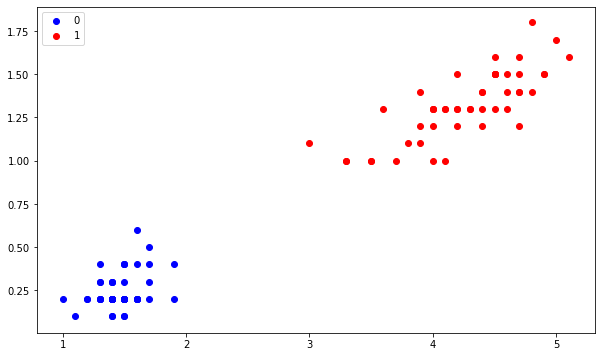

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'r', label='1')
plt.legend()

In [8]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [9]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1-h)).mean()

def predict(X, theta):
    h = sigmoid_function(np.dot(X, theta))
    return h.round()

In [10]:
lr = 0.01
num_iter = 1500

theta = np.random.randn(X.shape[1])

losses = []
accs = []

In [11]:
for i in range(num_iter):
    z = np.dot(X, theta)
    h = sigmoid_function(z)
    loss = loss_function(h, y)
    
    gradient = np.dot(X.T, (h-y)) / y.size
    theta -= lr*gradient
    
    if (i%5 ==0):
        # loss
        losses.append(loss)
        
        # accuracy (độ chính xác)
        preds = predict(X, theta)
        acc = (preds == y).mean()
        
        accs.append(acc)

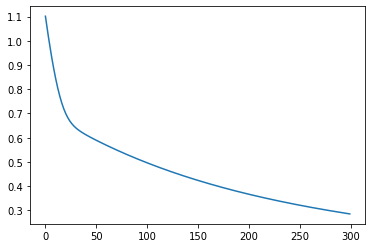

In [12]:
plt.plot(losses[:])

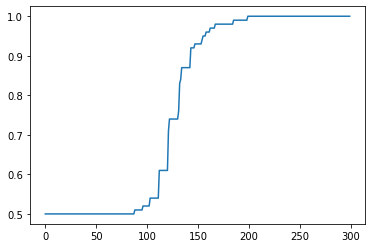

In [13]:
plt.plot(accs[:])